In [1]:
import pandas as pd
df = pd.read_csv('ML_vs_HUMAN.csv',delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USER_ID           95 non-null     int64  
 1   TRANSPORT_ID      95 non-null     int64  
 2   TRANSPORT_PRICE   95 non-null     float64
 3   MODEL_PREDICTION  95 non-null     float64
 4   MODEL_RMSE        95 non-null     float64
 5   USER_CALCULATION  95 non-null     float64
 6   USER_RMSE         95 non-null     float64
 7   USER_CATEGORY     95 non-null     object 
 8   DATA              95 non-null     object 
 9   COMPANY_SIZE      55 non-null     object 
 10  COMPANY_TYPE      55 non-null     object 
 11  FUNCTION          55 non-null     object 
 12  OLD               95 non-null     float64
 13  EXPERIENCE        55 non-null     float64
 14  COST_PLN          55 non-null     float64
 15  USER_TIME         95 non-null     int64  
 16  COST_EURO         40 non-null     float64
 17 

In [2]:
df["MODEL_RMSE"].agg(["mean", "median", "std","min","max"])

mean      18.696000
median    17.920000
std        9.463903
min        9.690000
max       35.520000
Name: MODEL_RMSE, dtype: float64

In [3]:
df["USER_RMSE"].agg(["mean", "median", "std","min","max"])

mean       233.617368
median     194.000000
std        185.623303
min          0.000000
max       1200.000000
Name: USER_RMSE, dtype: float64

In [4]:
df_USER_CATEGORY = df.groupby(['USER_CATEGORY'], as_index=False).USER_RMSE.mean()
df_USER_CATEGORY.sort_values('USER_RMSE')

,USER_CATEGORY,USER_RMSE
0,EXPERT,233.248182
1,STUDENT,234.125000


In [5]:
df_usercategory_transportid = df.groupby(['USER_CATEGORY', 'TRANSPORT_ID'], as_index=False).USER_RMSE.mean()
df_usercategory_transportid.sort_values('TRANSPORT_ID').round(2)

,USER_CATEGORY,TRANSPORT_ID,USER_RMSE
0,EXPERT,1,136.36
5,STUDENT,1,123.62
1,EXPERT,2,187.27
6,STUDENT,2,157.62
2,EXPERT,3,306.36
7,STUDENT,3,297.38
3,EXPERT,4,379.18
8,STUDENT,4,404.88
4,EXPERT,5,157.06
9,STUDENT,5,187.12


Text(0, 0.5, 'Mean absolute error [MAE]')

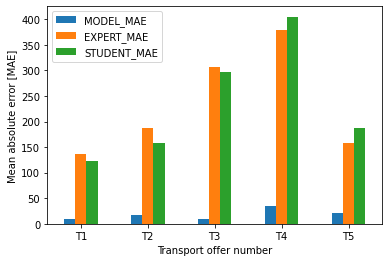

In [6]:
MODEL_MAE = [9.69, 17.92, 10.00, 35.52, 20.35]
EXPERT_MAE = [136.36, 187.27, 306.36, 379.18, 157.06]
STUDENT_MAE = [123.62, 157.62, 297.38, 404.88, 187.12]
index = ['T1', 'T2', 'T3', 'T4', 'T5']

df_bchart = pd.DataFrame({'MODEL_MAE': MODEL_MAE,
                   'EXPERT_MAE': EXPERT_MAE,'STUDENT_MAE': STUDENT_MAE}, index=index)

ax = df_bchart.plot.bar(rot=0)

ax.set_xlabel("Transport offer number")
ax.set_ylabel("Mean absolute error [MAE]")